### 2022-1 Artificial Intelligence (01)
## Homework #1: MLP from the scratch
---
Copyright (c) Prof. Jaehyeong Sim 

Department of Computer Science and Engineering

Ewha Womans University

In [1]:
import numpy as np

In [2]:
# Sigmoid function
def sigmoid(x):
  # Problem 1.(a): fill here
  return 1/(1+np.exp(-x))

# Derivative of sigmoid function
def dsigmoid(x):
  # Problem 1.(a): fill here
  return sigmoid(x)*(1-sigmoid(x))

# Hyperbolic tangent function
def tanh(x):
  # Problem 1.(a): fill here
  return np.tanh(x)

# Derivative of hyperbolic tangent function
def dtanh(x):
  # Problem 1.(a): fill here
  return 1-tanh(x)*tanh(x)

In [3]:
# Mean squared error function
def MSE(O, T):
  # Problem 1.(b): fill here
  B = O-T # elements를 O1-T1, O2-T2 ... 형태로 행렬 저장
  B *= B # elements를 (O1-T1)^2 (O2-T2)^2 ... 형태로 행렬 저장
  return np.sum(B) / B.size

# Derivative of hyperbolic tangent function
def dMSE(O, T):
  # Problem 1.(b): fill here
  return O-T;

In [4]:
class MLP:

  def __init__(self, learning_rate=0.01, n_epochs=5, n_inputs=2, n_hiddens=2, n_outputs=1):
    self.lr = learning_rate
    self.n_epochs = n_epochs
    
    self.n_inputs = n_inputs
    self.n_hiddens = n_hiddens
    self.n_outputs = n_outputs

    self.first_layer_activation_func = tanh
    self.first_layer_dactivation_func = dtanh
    self.second_layer_activation_func = sigmoid
    self.second_layer_dactivation_func = dsigmoid
    self.loss_func = MSE
    self.dloss_func = dMSE
    self.first_layer_weights = None
    self.first_layer_bias = None
    self.second_layer_weights = None
    self.second_layer_bias = None

  def _init_params(self):
    # Problem 1.(c): fill here
    np.random.seed(42)  # 재현 가능하도록
    
    self.first_layer_weights=np.random.random((self.n_inputs, self.n_hiddens)) # first_layer_weights 난수 발생 (2*2 행렬)
    self.first_layer_bias = np.zeros((1,self.n_hiddens), dtype=np.int64)
    self.second_layer_weights = np.random.random((self.n_hiddens, self.n_outputs))  # second_layer_weights 난수 발생 (2*1 행렬)
    self.second_layer_bias = np.zeros((1,self.n_outputs), dtype=np.int64)


  def _forward(self, X, T):
    # Problem 1.(d): fill here
    Z1 = np.dot(X,self.first_layer_weights)+self.first_layer_bias  # first_layer output value 계산
    A1 = self.first_layer_activation_func(Z1)   # A1=tanh(Z1)
    Z2 = np.dot(A1,self.second_layer_weights)+self.second_layer_bias  # second_layer output value 계산
    A2 = self.second_layer_activation_func(Z2)  # A2=sigmoid(Z2)
    
    loss = MSE(A2,T)
    
    return Z1, A1, Z2, A2, loss

  def _backward(self, X, Z1, A1, Z2, A2, T):
    # Problem 1.(e): fill here
    # second_layer weight gradient (second_layer_input * second_layer_err)
    X_len=len(X)

    dW2 = np.dot(A1.T, (A2-T))
    dW2 /= X_len

    # second_layer bias gradient(output - ground truth)
    dB2 = np.sum(A2-T) / X_len

    # first_layer weight gradient (second_layer_err * second_layer_weights * first_layer_inputs)
    first_layer_err = np.dot((A2-T), self.second_layer_weights.T) * dtanh(Z1)
    dW1 =  np.dot(X.T, first_layer_err)
    dW1 /= X_len

    # first_layer bias gradient
    dB1 = np.sum(first_layer_err,axis=0) / X_len
    
    return dW1, dB1, dW2, dB2

  def predict(self, X):
    Z1, A1, Z2, A2, loss =  self._forward(X, T)
    return A2

  def fit(self, X, T):
    
    self._init_params()
    loss_trace = []

    for _ in range(self.n_epochs):
      Z1, A1, Z2, A2, loss = self._forward(X, T)
      dW1, dB1, dW2, dB2 = self._backward(X, Z1, A1, Z2, A2, T)
        
      # Problem 1.(f): fill here
      self.first_layer_weights = self.first_layer_weights - self.lr * dW1 # first_layer weight 업데이트
      self.second_layer_weights = self.second_layer_weights - self.lr * dW2 # second_layer weight 업데이트
      self.first_layer_bias = self.first_layer_bias - self.lr * dB1 # first_layer bias 업데이트
      self.second_layer_bias = self.second_layer_bias - self.lr * dB2 # second_layer bias 업데이트

      loss_trace.append(loss)

    return loss_trace

In [5]:
# Problem 1.(g): fill here
X=np.array([[0,0], [0,1], [1,0], [1,1]])
T=np.array([0, 1, 1, 0]).reshape(4,1)
mlp=MLP(learning_rate=0.2, n_epochs=20000)
loss_trace = mlp.fit(X,T)

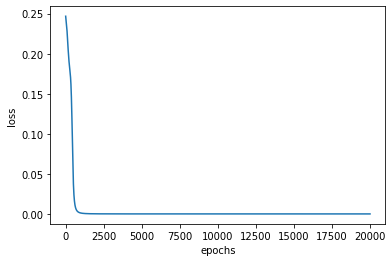

In [6]:
import matplotlib.pyplot as plt

plt.plot(loss_trace)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [7]:
# Print out XOR outputs for an input matrix X
print(mlp.predict(X))

[[0.00102272]
 [0.99945919]
 [0.99945901]
 [0.00105797]]


## [ loss_graph 결과 ]
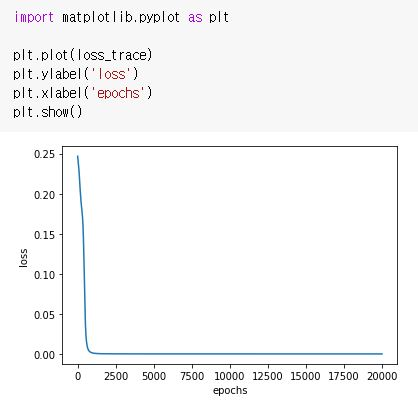

## [ predict 결과 ]
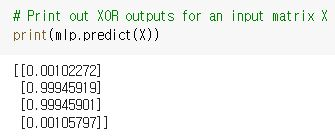!